In [13]:
# Base utilities
import os

# Data

# Data Mining
import math
import random
random_state = 42
random.seed(random_state)
seed=random_state
import numpy as np 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import pandana as pdn
import pickle as pkl
import shap


# Plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

# Learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split, KFold

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Directories (Si no existen se crean)
for d in ["data", "logs", "models", "networks"]:
    if not os.path.isdir(d):
        os.mkdir(d)

In [14]:


trips = pd.read_csv(f"data/Guadalajara_encoded_SEMS + NO SEMS_OK.csv",index_col=0)
trips = trips.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro'])

#print(trips.head().columns)

trips = trips.drop(trips[trips['Modo transporte'] == 'Public Transportation'].sample(38000).index)
# Reiniciar los índices
trips.reset_index(drop=True, inplace=True)

trips = trips.sample(frac=1).reset_index(drop=True)

# Renombrar las columnas en español a inglés
nuevos_nombres = {
    'NIVEL': 'Level',
    'CICLO': 'Cycle',
    'Centro': 'Center',
    'Promedio': 'Average',
    'SEXO': 'Gender',
    'EDAD': 'Age',
    'MUNICIPIO': 'Municipality',
    'Situacion conyugal': 'Marital status',
    'HIJOS': 'Children',
    'Personas en la vivienda': 'People in household',
    'Automoviles o camionetas en el hogar incluyendo cabina o caja': 'Cars/Vans in household',
    'Ingreso trimestral de todos los miembros del hogar': 'Quarterly family income',
    'Material del piso de la casa': 'Floor material of the house',
    'Agua entubada en la casa': 'Piped water in the house',
    'Luz electrica en la casa': 'Electric light in the house',
    'Primer integrante de la familia en asistir a la universidad': 'First to attend university',
    'drive_weight': 'Drive time',
    'walk_weight': 'Walk time',
    'transit_weight': 'Transit time'
}

trips.rename(columns=nuevos_nombres, inplace=True)
print(trips.head().columns)

Index(['Level', 'Cycle', 'Center', 'Average', 'Gender', 'Age', 'Municipality',
       'Modo transporte', 'Marital status', 'Children', 'People in household',
       'Cars/Vans in Household', 'Quarterly Household Income',
       'Floor material of the house', 'Piped water in the house',
       'Electric light in the house', 'First to Attend Uni', 'Drive time',
       'Walk time', 'Transit time'],
      dtype='object')


# Model Training and Evaluation

## Train-Test Split

## Model Training/Evaluation Framework

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle as pkl
import os
data=pd.DataFrame(columns=['Public Transportation','Private auto', 'Walk', 'Average'])
models = {}
def train_evaluate(model, k=10, cross_validation=True):
    
    model_name = type(model).__name__

    if cross_validation:
        print(model_name, "\n")
        print(f"{k}-FOLD CV\n")
        # k fold cross validation
        cv_scores = cross_val_score(model, X, y, cv=k, n_jobs=-1)

        # Scores on k-fold CV
        for i, score in zip(range(1, k+1), cv_scores):
            print(f"Round {i} score: {score}")
        print("")

        ax = sns.barplot(x=np.arange(1, 11), y=np.array(cv_scores))
        ax.set(xlabel='Round', ylabel='Accuracy', title=f"{k}-fold CV Accuracy plot")
        plt.show()

        # scores avg on k-fold CV
        print(f"Score avg on {k}-fold CV: {cv_scores.mean()}\n")

    # Final Model
    print("\nFinal Model\n")
    # Model Training
    model = model.fit(X_train, y_train)
    print("Accuracy: ", model.score(X_test, y_test), "\n")
    # Prediction and Report
    y_pred = model.predict(X_test)

    cm = metrics.confusion_matrix(y_test, y_pred)
    class_names = np.unique(y)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accuracy_per_class = np.diag(cm_percentage) * 100

    print("Accuracy per class:\n")

    class_names_list = list(class_names)
   
    
    # Añadir las precisiones al DataFrame
    data.loc[0] = [accuracy_per_class[class_names_list.index("Public Transportation")],
               accuracy_per_class[class_names_list.index("Private auto")],
               accuracy_per_class[class_names_list.index("Walk")], 100*model.score(X_test, y_test)]
    print(data)

    # pickle
    with open(os.path.join("models", f'{model_name}.pkl'), 'wb') as file:
        pkl.dump(model, file)


## Model Definition and Evaluation

## Random Forest

RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7580029368575624
Round 2 score: 0.7535976505139501
Round 3 score: 0.7573443008225617
Round 4 score: 0.7558754406580493
Round 5 score: 0.7461809635722679
Round 6 score: 0.745593419506463
Round 7 score: 0.754994124559342
Round 8 score: 0.7491186839012925
Round 9 score: 0.7423619271445359
Round 10 score: 0.7558754406580493



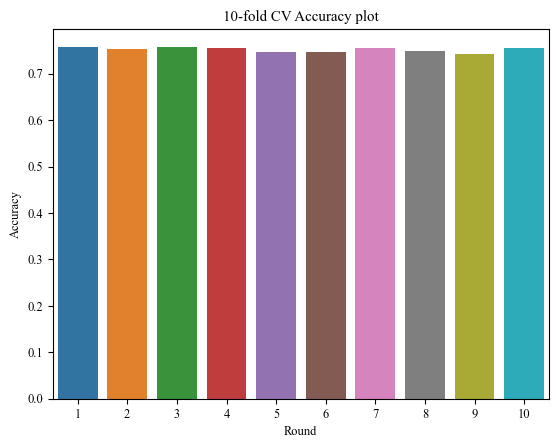

Score avg on 10-fold CV: 0.7518944888194075


Final Model

Accuracy:  0.7571722314696955 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.105058     75.735294  79.948586  75.717223
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7547723935389133
Round 2 score: 0.7518355359765051
Round 3 score: 0.7502937720329025
Round 4 score: 0.768801410105758
Round 5 score: 0.7376615746180963
Round 6 score: 0.745593419506463
Round 7 score: 0.7514688601645123
Round 8 score: 0.7508813160987075
Round 9 score: 0.7517626321974148
Round 10 score: 0.7511750881316098



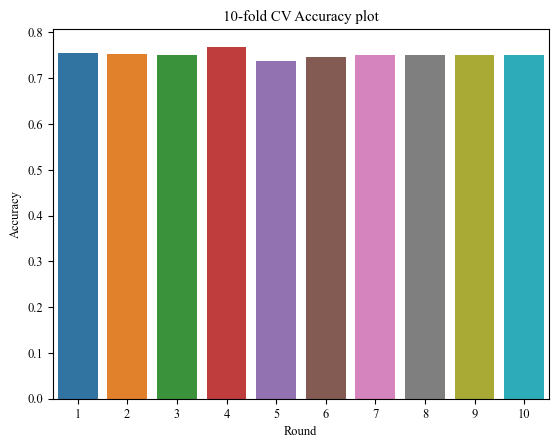

Score avg on 10-fold CV: 0.7514246002370882


Final Model

Accuracy:  0.7514931949476158 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              75.247525     73.020258  78.530184  75.149319
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7594713656387665
Round 2 score: 0.7530102790014684
Round 3 score: 0.7479435957696827
Round 4 score: 0.7467685076380729
Round 5 score: 0.7432432432432432
Round 6 score: 0.7535252643948296
Round 7 score: 0.7635135135135135
Round 8 score: 0.7529377203290247
Round 9 score: 0.7564629847238543
Round 10 score: 0.7426556991774383



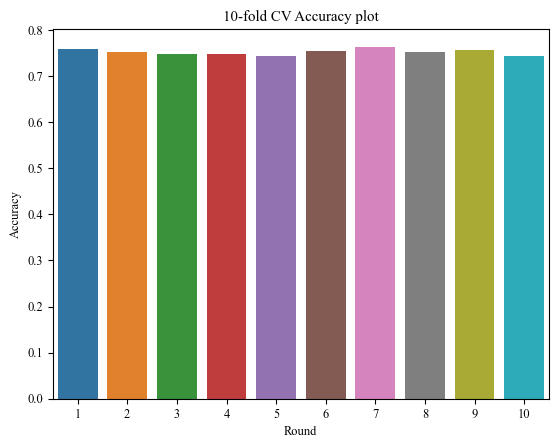

Score avg on 10-fold CV: 0.7519532173429895


Final Model

Accuracy:  0.7470870459218643 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.622179     72.862916  78.064177  74.708705
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7577092511013216
Round 2 score: 0.7600587371512482
Round 3 score: 0.75
Round 4 score: 0.7391304347826086
Round 5 score: 0.7394242068155111
Round 6 score: 0.745005875440658
Round 7 score: 0.7485311398354877
Round 8 score: 0.763807285546416
Round 9 score: 0.7614571092831962
Round 10 score: 0.7520564042303173



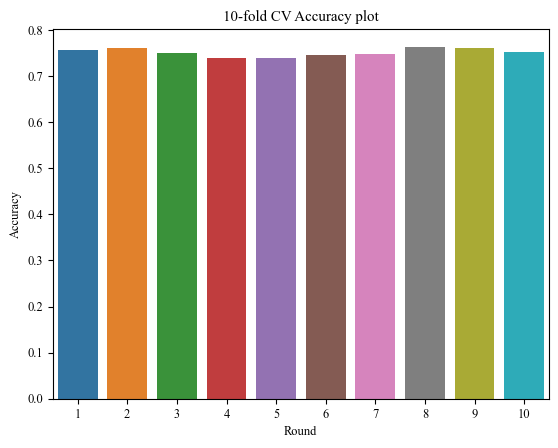

Score avg on 10-fold CV: 0.7517180444186764


Final Model

Accuracy:  0.746401644962303 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.726368     72.116564  78.682573  74.640164
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7541850220264317
Round 2 score: 0.7509544787077826
Round 3 score: 0.7617508813160987
Round 4 score: 0.7532314923619271
Round 5 score: 0.7426556991774383
Round 6 score: 0.7561692126909518
Round 7 score: 0.7382491186839013
Round 8 score: 0.7702702702702703
Round 9 score: 0.745005875440658
Round 10 score: 0.7420681551116334



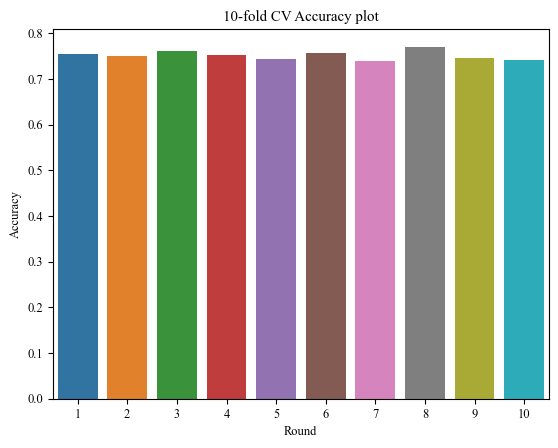

Score avg on 10-fold CV: 0.7514540205787092


Final Model

Accuracy:  0.755018114168217 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.492188     73.720565  81.184486  75.501811
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7497797356828194
Round 2 score: 0.7474302496328928
Round 3 score: 0.7602820211515864
Round 4 score: 0.7582256169212691
Round 5 score: 0.7461809635722679
Round 6 score: 0.7558754406580493
Round 7 score: 0.7467685076380729
Round 8 score: 0.7529377203290247
Round 9 score: 0.745005875440658
Round 10 score: 0.7447121034077556



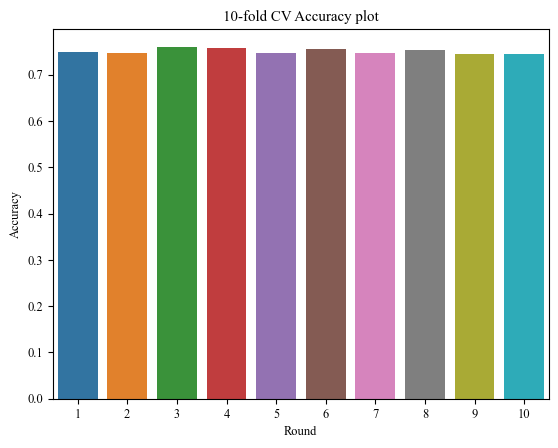

Score avg on 10-fold CV: 0.7507198234434396


Final Model

Accuracy:  0.7440516988152355 

Accuracy per class:

   Public Transportation  Private auto       Walk   Average
0              74.162205     72.819723  77.714286  74.40517
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7480176211453744
Round 2 score: 0.7650513950073421
Round 3 score: 0.754994124559342
Round 4 score: 0.7532314923619271
Round 5 score: 0.7529377203290247
Round 6 score: 0.7529377203290247
Round 7 score: 0.7661574618096357
Round 8 score: 0.745593419506463
Round 9 score: 0.7576380728554641
Round 10 score: 0.7667450058754407



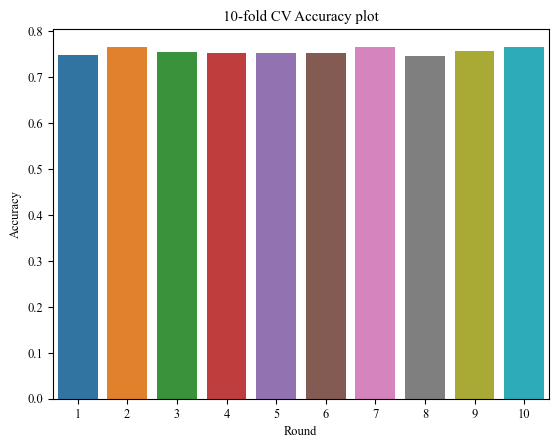

Score avg on 10-fold CV: 0.7563304033779039


Final Model

Accuracy:  0.7488495055321649 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.906441     73.002497  77.950311  74.884951
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7547723935389133
Round 2 score: 0.7541850220264317
Round 3 score: 0.7470622796709753
Round 4 score: 0.7476498237367802
Round 5 score: 0.75
Round 6 score: 0.750587544065805
Round 7 score: 0.750587544065805
Round 8 score: 0.7473560517038778
Round 9 score: 0.7417743830787309
Round 10 score: 0.749412455934195



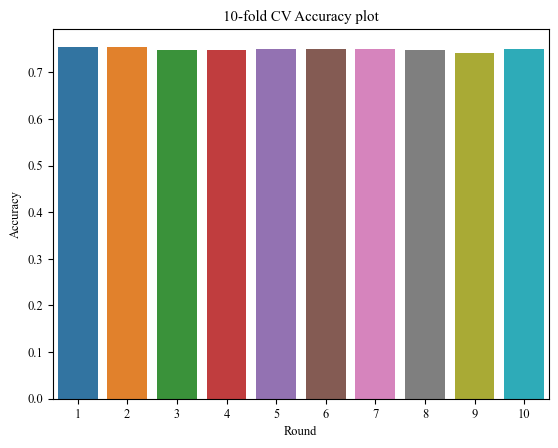

Score avg on 10-fold CV: 0.7493387497821514


Final Model

Accuracy:  0.7473807891902478 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              75.275157     72.701863  76.745407  74.738079
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7462555066079295
Round 2 score: 0.7406754772393539
Round 3 score: 0.7585193889541716
Round 4 score: 0.7473560517038778
Round 5 score: 0.7523501762632198
Round 6 score: 0.7520564042303173
Round 7 score: 0.7417743830787309
Round 8 score: 0.763219741480611
Round 9 score: 0.7561692126909518
Round 10 score: 0.75



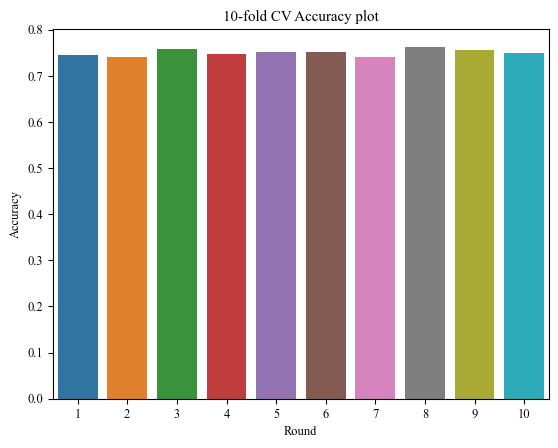

Score avg on 10-fold CV: 0.7508376342249163


Final Model

Accuracy:  0.7501223930284932 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.426358     72.405143  80.883117  75.012239
RandomForestClassifier 

10-FOLD CV

Round 1 score: 0.7512481644640235
Round 2 score: 0.7565345080763582
Round 3 score: 0.7473560517038778
Round 4 score: 0.7382491186839013
Round 5 score: 0.7658636897767332
Round 6 score: 0.7470622796709753
Round 7 score: 0.7594007050528789
Round 8 score: 0.750587544065805
Round 9 score: 0.7579318448883666
Round 10 score: 0.7608695652173914



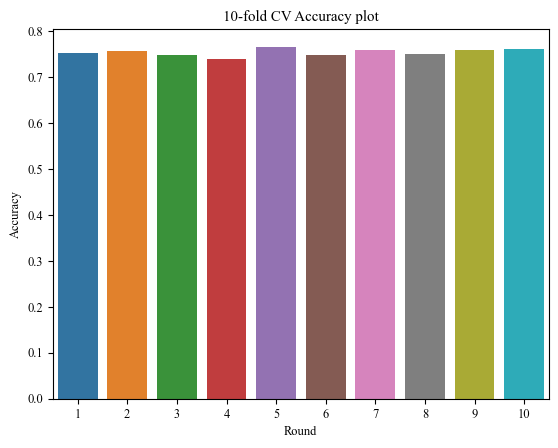

Score avg on 10-fold CV: 0.7535103471600311


Final Model

Accuracy:  0.7523744247527661 

Accuracy per class:

   Public Transportation  Private auto       Walk    Average
0              74.960907     74.346045  77.442827  75.237442
final
   Public Transportation  Private auto       Walk    Average
0              74.105058     75.735294  79.948586  75.717223
0              75.247525     73.020258  78.530184  75.149319
0              74.622179     72.862916  78.064177  74.708705
0              74.726368     72.116564  78.682573  74.640164
0              74.492188     73.720565  81.184486  75.501811
0              74.162205     72.819723  77.714286  74.405170
0              74.906441     73.002497  77.950311  74.884951
0              75.275157     72.701863  76.745407  74.738079
0              74.426358     72.405143  80.883117  75.012239
0              74.960907     74.346045  77.442827  75.237442


In [18]:
n_runs = 10
acc = pd.DataFrame(columns=['Public Transportation','Private auto', 'Walk', 'Average'])

for i in range(n_runs):

    trips = pd.read_csv(f"data/Guadalajara_encoded_SEMS + NO SEMS_OK.csv",index_col=0)
    trips = trips.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro'])

    #print(trips.head().columns)
    trips = trips.drop(trips[trips['Modo transporte'] == 'Public Transportation'].sample(38000).index)
    # Reiniciar los índices
    trips.reset_index(drop=True, inplace=True)
    trips = trips.sample(frac=1).reset_index(drop=True)

    X = np.array(trips.drop(columns="Modo transporte"))
    y = np.array( trips["Modo transporte"] )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    rf = RandomForestClassifier(n_estimators=20,random_state=random_state)
    train_evaluate(rf)
    
    
    acc = pd.concat([acc, data])

print('final')
print(acc)
    

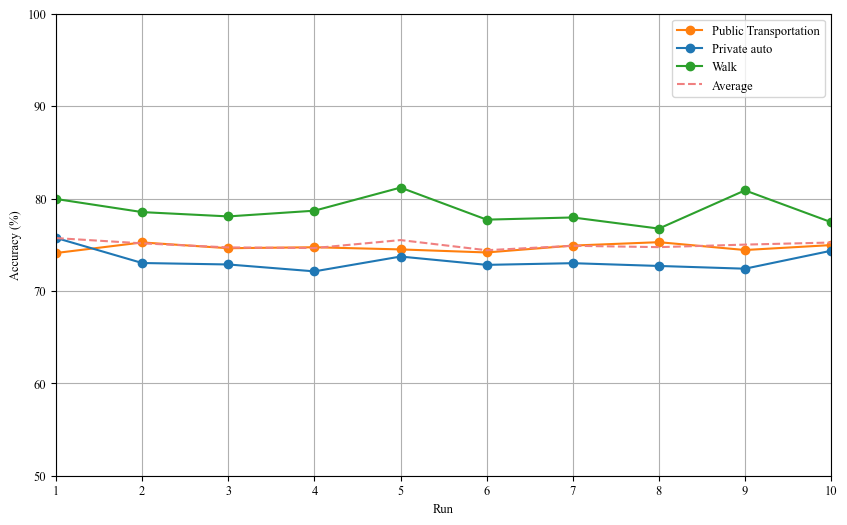

In [19]:
import matplotlib.pyplot as plt

# Configurar la fuente y el tamaño de fuente
plt.rc('font', family='Times New Roman', size=9)

# Diccionario de colores y estilos de línea
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green', 'Average': 'lightcoral'}
line_styles = {'Private auto': '-', 'Public Transportation': '-', 'Walk': '-', 'Average': '--'}

# Transponer el DataFrame
acc_transposed = acc.transpose()

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Plotear los valores de cada fila
for i, row in acc_transposed.iterrows():
    if i == 'Average':
        plt.plot(range(1, 11), row, linestyle=line_styles.get(i, '-'), label=i, color=colors.get(i, 'tab:blue'))
    else:
        plt.plot(range(1, 11), row, marker='o', linestyle=line_styles.get(i, '-'), label=i, color=colors.get(i, 'tab:blue'))  # Obtener el color y el estilo de línea del diccionario, usar azul y línea continua si no están definidos

# Añadir la leyenda y ajustar las etiquetas y el título
plt.xlabel('Run')
plt.ylabel('Accuracy (%)')

plt.xticks(range(1, 11))  # Mostrar solo números en el eje x
plt.xlim(1, 10)  # Limitar los valores del eje x de 1 a 10
plt.ylim(50, 100)  # Escalar el eje y de 0 a 100
plt.legend()
plt.grid(True)
plt.show()



In [20]:
import pandas as pd

# Calculate the mean and standard deviation of each column
mean_values = acc.mean()
std_values = acc.std()

# Display the results
print("Mean of each column:")
print(mean_values)
print("\nStandard deviation of each column:")
print(std_values)

import pandas as pd

# Calculate the mean and standard deviation of each column
mean_values = acc.mean()
std_values = acc.std()

# Create a DataFrame to display the results
summary_table = pd.DataFrame({
    'Mean': mean_values.round(2),
    'Standard Deviation': std_values.round(2)
})

# Display the table
print(summary_table)


Mean of each column:
Public Transportation    74.692439
Private auto             73.273087
Walk                     78.714595
Average                  74.999510
dtype: float64

Standard deviation of each column:
Public Transportation    0.409431
Private auto             1.071967
Walk                     1.485616
Average                  0.407573
dtype: float64
                        Mean  Standard Deviation
Public Transportation  74.69                0.41
Private auto           73.27                1.07
Walk                   78.71                1.49
Average                75.00                0.41
